In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import yfinance
import pylab
import random
from monte_funcs import *
from IPython.display import clear_output
import datetime
import hurst

In [3]:
vx = pd.read_csv('vixts.csv')
rates = np.random.lognormal(0,0.09,1000) - 1

In [ ]:
plt.hist(rates)

In [ ]:
[plt.plot(pnl_walk(100, 25, rates)) for i in range(10000)]

In [ ]:
pnl = pd.DataFrame([100,105,102,300,201,2011,302,2])
pnl.cummax()

In [ ]:
#(strat, starting_amt, max_draw, wait_after_stop, tkrs, rolling_lookback, n_paths, n_days_project):

In [ ]:
def test_hurst(ticker):
    dfs = sim_and_test('LongShort', 100, 0.10, 10, [f'{ticker}'], 2, 2500, 3)
    dfs[f'{ticker}'][f'{ticker}'] = yfinance.download(f'{ticker}')['Close']
    dfs[f'{ticker}']['hurst'] = dfs[f'{ticker}'][f'{ticker}'].rolling(100).apply(hurst_exp)
    dfs[f'{ticker}'] = dfs[f'{ticker}'].dropna(axis=0)
    dfs[f'{ticker}']['hurst_quantile'] = pd.qcut(dfs[f'{ticker}']['hurst'], q = 4)
    return dfs[f'{ticker}'].groupby('hurst_quantile').mean()
    

In [ ]:
dfs = sim_and_test('LongShort', .05,  100, .1, 1, ['FB'], 3,1000, 2)

In [26]:
dfs['COIN'] = dfs['COIN'].pct_change().replace([np.inf, -np.inf], np.nan).dropna(axis = 0)/100
dfs['COIN'].mean()

3_1000_2_COIN    0.242422
Long_COIN        0.224202
Strat_Ret        0.439492
dtype: float64

In [7]:
dfs['COIN']['3_1000_2_COIN'][-1] 

107.4421240446533

In [ ]:
import yfinance
yfinance.download("qqq")

In [85]:
spy = dfs['MNQ=F'].reset_index().dropna(axis=0)
spy_comb = spy[spy['Date'].between('2011-05-02','2021-07-08')].reset_index()
spy_comb['dix'] = gex['dix']
spy_comb['gex'] = gex['gex']
spy_comb
spy_comb['gex_quantile'] = pd.qcut(spy_comb['gex'], q = 4)
spy_comb['dix_quantile'] = pd.qcut(spy_comb['dix'], q = 4)
spy_comb.groupby('gex_quantile').mean()

#spy.join(gex,on='Date')

,index,20_1000_2_MNQ=F,Long_MNQ=F,Strat_Ret,dix,gex
gex_quantile,,,,,,
"(-1220488012.9589999, 786423702.09]",170.694656,123.615034,129.880870,0.278777,0.439411,1.517765e+08
"(786423702.09, 1462342360.705]",275.307692,144.366748,149.767500,0.240515,0.421620,1.139907e+09
"(1462342360.705, 2120779337.025]",288.538462,146.317952,150.596056,0.037731,0.415769,1.800823e+09
"(2120779337.025, 8992652051.085]",310.153846,147.660721,149.912405,0.156371,0.420270,2.785534e+09


In [86]:
spy_comb.groupby('dix_quantile').mean()

,index,20_1000_2_MNQ=F,Long_MNQ=F,Strat_Ret,dix,gex
dix_quantile,,,,,,
"(0.336, 0.402]",358.770992,163.876980,168.483318,0.180734,0.386808,1.668504e+09
"(0.402, 0.424]",295.092308,148.022264,152.545878,0.151603,0.413347,1.603946e+09
"(0.424, 0.445]",217.746154,130.988530,133.601234,0.046972,0.434382,1.615343e+09
"(0.445, 0.503]",171.638462,118.762974,125.229459,0.334838,0.462937,9.785802e+08


In [52]:
#works best on low gex and high dix
spy_comb['gex_quantile'] = [str(i) for i in spy_comb['gex_quantile']]
spy_comb['dix_quantile'] = [str(i) for i in spy_comb['dix_quantile']]

<ipython-input-67-5d6e949dd726>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plt.hist(spy_comb[spy_comb['gex_quantile']=='(3294035683.861, 24218668212.87]'][spy_comb['dix_quantile']== '(0.33, 0.402]']['Strat_Ret'], bins = 20)


(array([  1.,   0.,   0.,   0.,   0.,   0.,   1.,   1.,   3.,   2.,   1.,
          3.,   6.,  18., 124.,  22.,  15.,   6.,   4.,   2.]),
 array([-14.19937945, -13.23796199, -12.27654453, -11.31512707,
        -10.35370961,  -9.39229214,  -8.43087468,  -7.46945722,
         -6.50803976,  -5.5466223 ,  -4.58520483,  -3.62378737,
         -2.66236991,  -1.70095245,  -0.73953499,   0.22188248,
          1.18329994,   2.1447174 ,   3.10613486,   4.06755232,
          5.02896979]),
 <BarContainer object of 20 artists>)

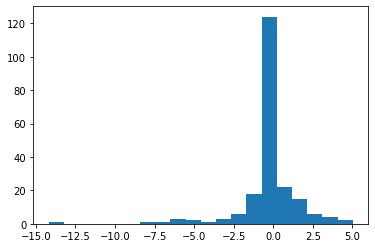

<ipython-input-77-619e04df1219>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  worst = spy_comb[spy_comb['gex_quantile']=='(3294035683.861, 24218668212.87]'][spy_comb['dix_quantile']== '(0.33, 0.402]']['Strat_Ret']
<ipython-input-77-619e04df1219>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  best = spy_comb[spy_comb['gex_quantile']=='(-4255747479.391, 1245022453.062]'][spy_comb['dix_quantile']== '(0.439, 0.525]']['Strat_Ret']


(array([[  1.,   0.,   0.,   0.,   0.,   1.,   3.,   3.,   2.,   5.,  14.,
         123.,  33.,  16.,   5.,   2.,   1.,   0.,   0.,   0.],
        [  1.,   0.,   0.,   1.,   0.,   3.,   4.,   5.,  10.,  14.,  32.,
         232.,  82.,  40.,  20.,  15.,   6.,   1.,   1.,   1.]]),
 array([-14.19937945, -13.00826774, -11.81715603, -10.62604432,
         -9.43493261,  -8.2438209 ,  -7.05270918,  -5.86159747,
         -4.67048576,  -3.47937405,  -2.28826234,  -1.09715063,
          0.09396109,   1.2850728 ,   2.47618451,   3.66729622,
          4.85840793,   6.04951964,   7.24063136,   8.43174307,
          9.62285478]),
 <a list of 2 BarContainer objects>)

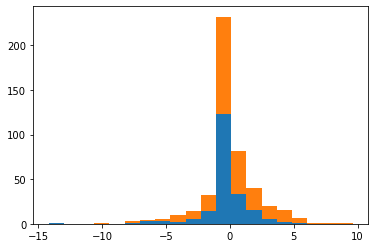

In [77]:
#WORST
worst = spy_comb[spy_comb['gex_quantile']=='(3294035683.861, 24218668212.87]'][spy_comb['dix_quantile']== '(0.33, 0.402]']['Strat_Ret']
best = spy_comb[spy_comb['gex_quantile']=='(-4255747479.391, 1245022453.062]'][spy_comb['dix_quantile']== '(0.439, 0.525]']['Strat_Ret']
plt.hist([worst,best], bins = 20, label = 'High GEX, Low DIX', stacked = True)
plt.legend()

(array([1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00,
        3.000e+00, 5.000e+00, 2.000e+00, 5.000e+00, 8.000e+00, 2.000e+01,
        1.000e+01, 3.200e+01, 6.000e+01, 1.210e+02, 2.230e+02, 1.226e+03,
        3.630e+02, 2.140e+02, 1.130e+02, 6.300e+01, 3.300e+01, 1.300e+01,
        1.100e+01, 5.000e+00, 1.000e+00, 2.000e+00, 4.000e+00]),
 array([-23.65840942, -22.6619372 , -21.66546498, -20.66899276,
        -19.67252054, -18.67604832, -17.6795761 , -16.68310388,
        -15.68663166, -14.69015944, -13.69368722, -12.69721501,
        -11.70074279, -10.70427057,  -9.70779835,  -8.71132613,
         -7.71485391,  -6.71838169,  -5.72190947,  -4.72543725,
         -3.72896503,  -2.73249281,  -1.7360206 ,  -0.73954838,
          0.25692384,   1.25339606,   2.24986828,   3.2463405 ,
          4.24281272,   5.23928494,   6.23575716,   7.23222938,
          8.22870159,   9.22517381,  10.22164603,  11

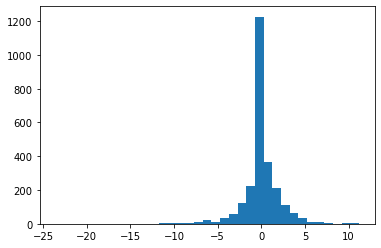

In [47]:
plt.hist(spy_comb['Strat_Ret'], bins = 35)

In [32]:
gex = pd.read_csv('gex.csv')
gex = gex.rename({'date':'Date'}, axis = 1)[:-22]
gex

,Date,price,dix,gex
0,2011-05-02,1361.219971,0.378842,1.897313e+09
1,2011-05-03,1356.619995,0.383411,1.859731e+09
2,2011-05-04,1347.319946,0.392122,1.717764e+09
3,2011-05-05,1335.099976,0.405457,1.361864e+09
4,2011-05-06,1340.199951,0.418649,1.490329e+09
...,...,...,...,...
2537,2021-06-01,4202.040039,0.418425,3.473156e+09
2538,2021-06-02,4208.120117,0.428627,4.142372e+09
2539,2021-06-03,4192.850098,0.409328,7.235541e+08
2540,2021-06-04,4229.890137,0.435628,2.749222e+09


In [ ]:
#vx['Date'] = [datetime.datetime.strptime(str(i) ,'%Y%m%d') for i in vx['Date']]
pnl_with_vix = spy_df.merge(vx[vx['Date'].between(str(df['SPY'].index[0]), str(df['SPY'].index[-1]))])

In [ ]:
plt.hist(pnl_with_vix['Strat_Ret'], bins = 35)

In [ ]:
pnl_with_vix['pnl_quantile'] = pd.qcut(pnl_with_vix['Strat_Ret'], q = 2)
grouped = pnl_with_vix.groupby('pnl_quantile').mean().iloc[:,3:].transpose()
for col in grouped:
    plt.plot(grouped[col], label = col)
plt.legend()

In [ ]:
pnl_with_vix['vix_1_quantile'] = pd.qcut(pnl_with_vix['VIX_1^2'], q = 4)
grouped = pd.DataFrame(pnl_with_vix.groupby('vix_1_quantile').mean().iloc[:,2].transpose())
grouped = grouped.reset_index()

plt.bar([str(i) for i in grouped['vix_1_quantile']],grouped['Strat_Ret'], label = 'Strat Ret')
plt.legend()
grouped

In [ ]:
pnl_with_vix['vix_2_quantile'] = pd.qcut(pnl_with_vix['VIX_2^2'], q = 4)
grouped = pd.DataFrame(pnl_with_vix.groupby('vix_2_quantile').mean().iloc[:,2].transpose())
grouped = grouped.reset_index()

plt.bar([str(i) for i in grouped['vix_2_quantile']],grouped['Strat_Ret'], label = 'Strat Ret')
plt.legend()
grouped

In [ ]:
pnl_with_vix['vix_3_quantile'] = pd.qcut(pnl_with_vix['VIX_3^2'], q = 4)
grouped = pd.DataFrame(pnl_with_vix.groupby('vix_3_quantile').mean().iloc[:,2].transpose())
grouped = grouped.reset_index()

plt.bar([str(i) for i in grouped['vix_3_quantile']],grouped['Strat_Ret'], label = 'Strat Ret')
plt.legend()
grouped

In [ ]:
pnl_with_vix['vix_6_quantile'] = pd.qcut(pnl_with_vix['VIX_6^2'], q = 4)
grouped = pd.DataFrame(pnl_with_vix.groupby('vix_6_quantile').mean().iloc[:,2].transpose())
grouped = grouped.reset_index()

plt.bar([str(i) for i in grouped['vix_6_quantile']],grouped['Strat_Ret'], label = 'Strat Ret')
plt.legend()
grouped

In [ ]:
pnl_with_vix['vix_9_quantile'] = pd.qcut(pnl_with_vix['VIX_9^2'], q = 4)
grouped = pd.DataFrame(pnl_with_vix.groupby('vix_9_quantile').mean().iloc[:,2].transpose())
grouped = grouped.reset_index()

plt.bar([str(i) for i in grouped['vix_9_quantile']],grouped['Strat_Ret'], label = 'Strat Ret')
plt.legend()
grouped

In [ ]:
pnl_with_vix['vix_12_quantile'] = pd.qcut(pnl_with_vix['VIX_12^2'], q = 4)
grouped = pd.DataFrame(pnl_with_vix.groupby('vix_12_quantile').mean().iloc[:,2].transpose())
grouped = grouped.reset_index()

plt.bar([str(i) for i in grouped['vix_12_quantile']],grouped['Strat_Ret'], label = 'Strat Ret')
plt.legend()
grouped

In [ ]:
pairs = [[0.0204, 0.0342], [0.0227, 0.0335], [0.0245, 0.0385], [0.0283, 0.0418], 
[0.0307, 0.0431], [0.0142, 0.0322]] 
plt.plot([pair[0] for pair in pairs])
plt.plot([pair[1] for pair in pairs]) 

In [ ]:
pnl_with_vix

In [ ]:
plt.plot(pnls['5_50_2_AMZN'], label = 'Strat')
plt.plot(pnls['Long_AMZN'], label = 'Long AMZN')
plt.legend()

In [ ]:
yfinance.download('QQQ')

In [ ]:
qqq_df = pd.DataFrame(pnls)
qqq_df['Strat_Ret'] = qqq_df['5_50_5_QQQ'] - qqq_df['5_50_5_QQQ'].shift(1)

In [ ]:
def sharpe(ret, sd):
    return (ret)/sd

In [ ]:
total_ret = (qqq_df.iloc[-1]['5_50_5_QQQ'] - qqq_df.iloc[0]['5_50_5_QQQ'])/qqq_df.iloc[0]['5_50_5_QQQ']
qqq_df['pct_return'] = qqq_df.pct_change()['5_50_5_QQQ']

In [ ]:
np.mean(qqq_df['pct_return'])/np.std(qqq_df['pct_return'])

In [ ]:
np.mean(qqq_df['5_50_5_QQQ'])/np.std(qqq_df['5_50_5_QQQ'])

In [ ]:
np.mean(qqq_df['Long_QQQ'])/np.std(qqq_df['Long_QQQ'])

In [ ]:
qqq_df

In [ ]:
for key in pnls.keys():
    plt.plot(pnls[key], label = key)
    print(f'Sharpe({key}):{np.mean(pd.DataFrame(pnls[key])/np.std(pd.DataFrame(pnls[key])))}')
plt.legend()

In [ ]:
plt.plot(pnls['4_4'])

In [ ]:
pnl = [100000]
errors = []
pnl_spy = [100000]

for i in range(len(dta)-1):
    pnl_spy.append(pnl_spy[-1] * (1+dta.iloc[i+1]['Pct_Change']))
    if dta.iloc[i]['Close'] < dta.iloc[i]['E']:
        pnl.append(pnl[-1]*(1+dta.iloc[i+1]['Pct_Change']))
    else:
        pnl.append(pnl[-1])
        #pnl.append(pnl[i]*(1+(-1*dta.iloc[i]['Pct_Change'])))
    errors.append(dta.iloc[i]['Actual'] - dta.iloc[i]['E'])
plt.plot(pnl)
plt.plot(pnl_spy)

In [ ]:
print(np.mean(pnl)/np.std(pnl), np.mean(pnl_spy)/np.std(pnl_spy))

In [ ]:
df = pd.DataFrame()
df['PNL']= pnl
df['PNL_Pct_Change'] = df.pct_change()
df['PNL_Change'] = df['PNL'] - df['PNL'].shift(1)
df
#plt.hist(df['PNL_Change'], bins = 1000)
#plt.hist(df['PNL'], bins = 1000)
df
#np.mean(df['PNL'])/np.std(df['PNL'])

In [ ]:
plt.plot(dta['Close'])


In [ ]:
#simulated sp500
def pnl_walk(a, n, rates):
    # defining the number of steps
    
    # n must = lenrates

    #creating two array for containing x and y coordinate
    #of size equals to the number of size and filled up with 0's
    x = numpy.zeros(n)
    x[0] = a

    # filling the coordinates with random variables
    for i in range(1, n):
        rate = np.random.choice(rates)
        x[i] = x[i-1]*(1+rate)
    
    
    return x


In [ ]:
def simulate_rndm_pnl(n_sims, starting_val, steps, generated):
    ends = []
    sers = []
    for i in range(n_sims):
        ser = pnl_walk(starting_val, steps, generated)
        sers.append(ser)
        ends.append(ser[-1])
        #plt.plot(ser)
    
    return sers, ends
    #plt.ticklabel_format(style = 'plain')
    #print(f'Mean Ending Value = {np.mean(ends)}, Sd = {np.std(ends)/n_sims}')

In [ ]:
import pandas as pd
close_copy = close.copy()
cur = close_copy.iloc[-1]['log_return']
rolling_sd = close_copy.iloc[-1]['rolling_sd']
rolling_mean = close_copy.iloc[-1]['rolling_mean']
generated = np.random.normal(rolling_mean,rolling_sd,1000)
paths = simulate_rndm_pnl(1000, cur, 25,generated)
df = pd.DataFrame(paths).transpose()

In [ ]:
for col in df:
    plt.plot(df[col])

In [ ]:
data = 